https://www.alvinang.sg/s/auto.csv



---



#Step 1: Previewing Data

##1a): Import All Libraries

In [25]:
import pandas as pd
import missingno as msno
import matplotlib.pylab as plt
%matplotlib inline

##1b) Load the Data and Preview

In [26]:
headers = ["symboling",
           "normalized-losses",
           "make",
           "fuel-type",
           "aspiration", 
           "num-of-doors",
           "body-style",
           "drive-wheels",
           "engine-location",
           "wheel-base",
           "length",
           "width",
           "height",
           "curb-weight",
           "engine-type", 
           "num-of-cylinders", 
           "engine-size",
           "fuel-system",
           "bore",
           "stroke",
           "compression-ratio",
           "horsepower",
           "peak-rpm",
           "city-mpg",
           "highway-mpg",
           "price"]

df = pd.read_csv("https://www.alvinang.sg/s/auto.csv", names = headers)

df.sample(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
183,2,122,volkswagen,gas,std,two,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,9.0,85,5250,27,34,7975
177,-1,65,toyota,gas,std,four,hatchback,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92,4200,27,32,11248
185,2,94,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,9.0,85,5250,27,34,8195
68,-1,93,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28248
59,1,129,mazda,gas,std,two,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,8845




---



#Step 2: Visualizing NaNs

##2a) Replace All '?' with NaNs

In [27]:
import numpy as np

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)

df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


##2b) Using MissingNo to Visualize NaNs

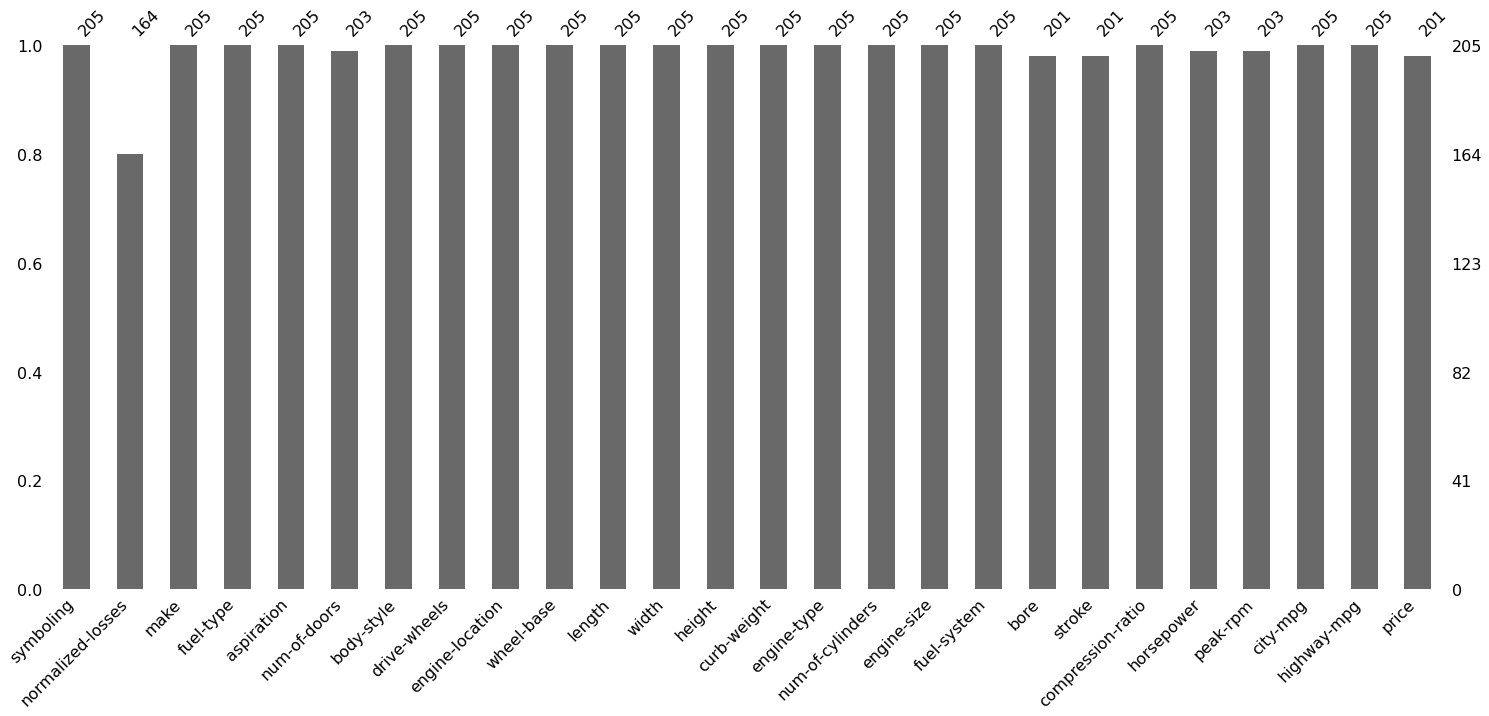

In [28]:
msno.bar(df)

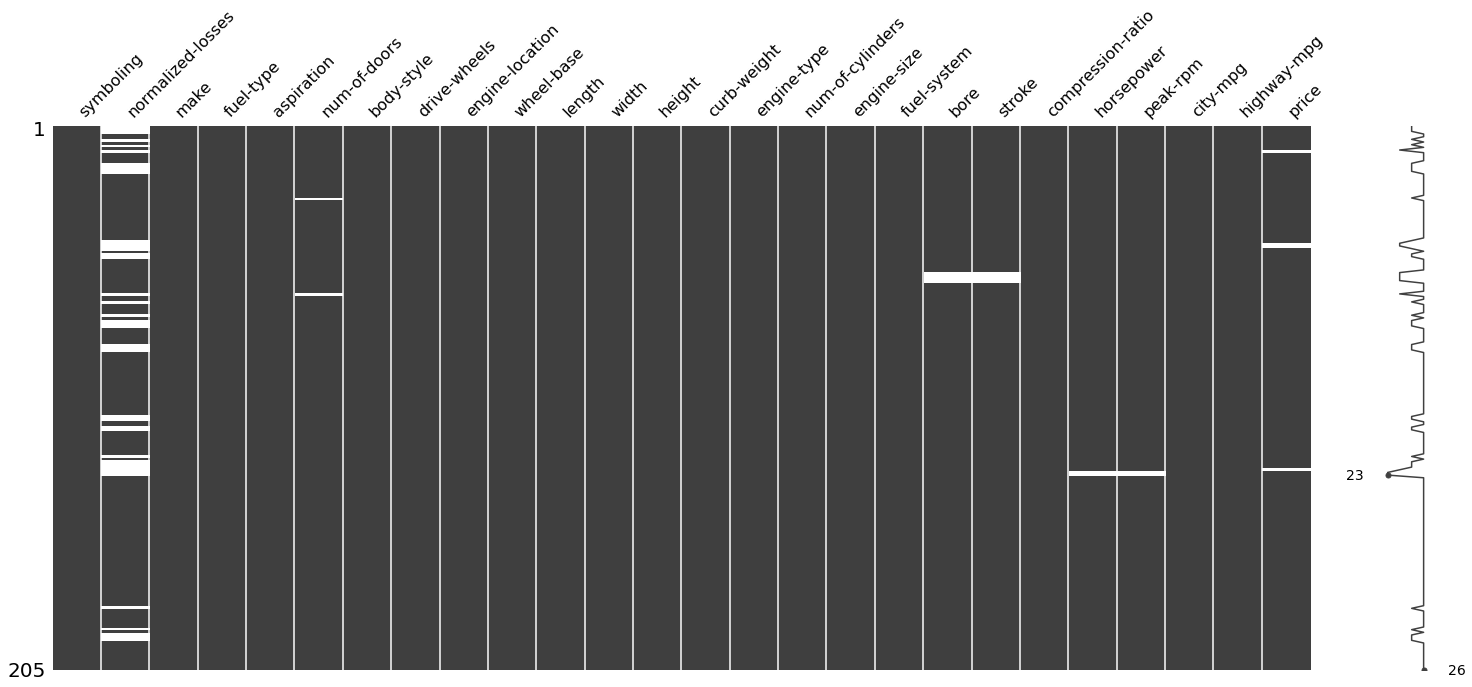

In [29]:
msno.matrix(df)

##2c) Count Number of NaNs in Each Column

In [30]:
missing_data = df.isnull()

In [31]:
for column in missing_data.columns.values.tolist():
  print(column)
  print(missing_data[column].value_counts())
  print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

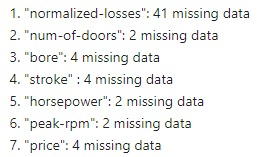



---



#Step 3: Dealing with Missing Data

##3a) NaNs in the 'Price' Column - Drop All NaNs  

In [32]:
df.dropna(subset=["price"], axis=0, inplace=True)

# “Price” column has 4 missing data
#	We simply delete the whole row
#	Reason: price is what we want to predict. 
#	Any data entry without price data cannot be used for prediction; 
# therefore any row now without price data is not useful to us
#	Drop all rows with NaN values

In [33]:
df.reset_index(drop=True, inplace=True)

#	Reset the index because we dropped the rows

##3b) NaNs in 'Normalized Losses' Column - Replace with Mean 

In [34]:
avg = df["normalized-losses"].astype("float").mean(axis=0)

print("Average of Normalized-Losses Column:", avg)

Average of Normalized-Losses Column: 122.0


In [35]:
df["normalized-losses"].replace(np.nan, avg, inplace=True)

##3c) NaNs in 'Number of Doors' Column - Replace with Most Occuring Frequency

In [36]:
df['num-of-doors'].value_counts()

four    113
two      86
Name: num-of-doors, dtype: int64

In [37]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [38]:
df["num-of-doors"].replace(np.nan, "four", inplace=True)

##3d) Glancing at All Columns NaNs

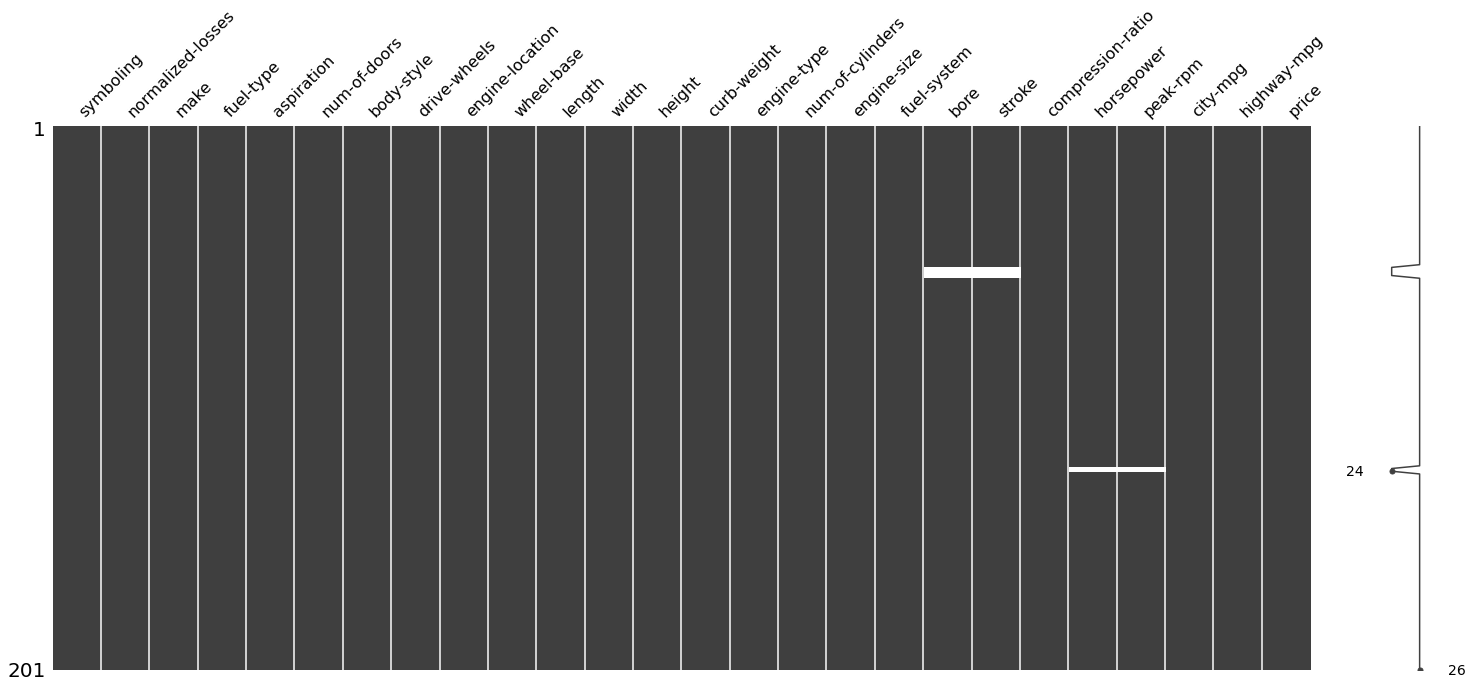

In [39]:
msno.matrix(df)



---



#Step 4: Changing the Columns Data Type

In [40]:
df.dtypes

#Normalized Losses is object = it should be integer
#Bore and Stroke are objects = they should be float
#Peak-rpm is object = it should be float
#Price is object = it should be float

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [41]:
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")

df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")

df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

df[["price"]] = df[["price"]].astype("float")



---



#Step 5: Transform Miles Per Gallon (MPG) to L/100km

In [42]:
df["highway-mpg"] = 235/df["highway-mpg"]

In [43]:
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)

In [45]:
df['highway-L/100km'].head()

#we see that 'highway-mpg' has been renamed to 'highway-L/100km'

0     8.703704
1     8.703704
2     9.038462
3     7.833333
4    10.681818
Name: highway-L/100km, dtype: float64



---



#Step 6: Normalizing Length + Width + Height

In [46]:
df['length'] = df['length']/df['length'].max()

df['width'] = df['width']/df['width'].max()

df['height'] = df['height']/df['height'].max()

In [47]:
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027




---



#THE END